In [ ]:
!nvidia-smi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IMPORTS

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display, Image

import cv2
%matplotlib inline
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

import os
from os import listdir
from os.path import isfile, join
import json
import numpy as np
from matplotlib import pyplot as plt
from urllib.request import urlopen

Ultralytics YOLOv8.0.138 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.3/78.2 GB disk)


# UTILS

In [ ]:
def json2txt():
    """
    This function converts annotations from json format to txt format.
    Required for YOLOv8
    """

    onlyfiles = [f for f in listdir() if isfile(join(f)) and f[-5:]=='.json']
    print(onlyfiles)

    for _file in onlyfiles:

        with open(_file) as user_file:
            file_contents = user_file.read()

        parsed_json = json.loads(file_contents)

        _regions_in_file = []

        for _regions in parsed_json["regions"]:
            lines = "0" # class id. There is only 1 class, thus it is possible to hardcode

            for _points in _regions["points"]:
                _ = " " + str(_points[0]) + " " + str(_points[1])
                lines += _
            _regions_in_file.append(lines)

        with open(_file[:-5] + '.txt', 'w') as f:
            for line in _regions_in_file:
                f.write(line)
                f.write('\n')
    return 1

# YOLOv8 PRETRAINED MODEL

In [ ]:
# model = YOLO("yolov8m-seg.pt")  # Medium model
model = YOLO("yolov8x-seg.pt")  # XLarge model

100%|██████████| 137M/137M [00:02<00:00, 63.0MB/s]


# TRAINING

In [ ]:
model.train(data='/content/gdrive/My Drive/Projects/gw/config.yaml', epochs=50, imgsz=640, batch=8)

Ultralytics YOLOv8.0.137 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/content/gdrive/My Drive/Projects/data_3/config.yaml, epochs=50, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=F

# VALIDATION

In [ ]:
# model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('runs/segment/train/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.137 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71721619 parameters, 0 gradients
val: Scanning /content/gdrive/My Drive/Projects/data_3/val/labels.cache... 106 images, 0 backgrounds, 0 corrupt: 100%|██████████| 106/106 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/gdrive/My Drive/Projects/data_3/val/images/IMG_3020.JPG: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/gdrive/My Drive/Projects/data_3/val/images/IMG_3021_VHRN.JPG: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/gdrive/My Drive/Projects/data_3/val/images/IMG_3022.JPG: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/gdrive/My Drive/Projects/data_3/val/images/IMG_3022_VHRN.JPG: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/gdrive/My Drive/Projects/data_3/val/images/IMG_3023_VHRN.JPG: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/gdrive/My Drive/Projects/data_3/val/images/IMG_3025_VHRN.JPG: corrupt JPEG

array([    0.63188])

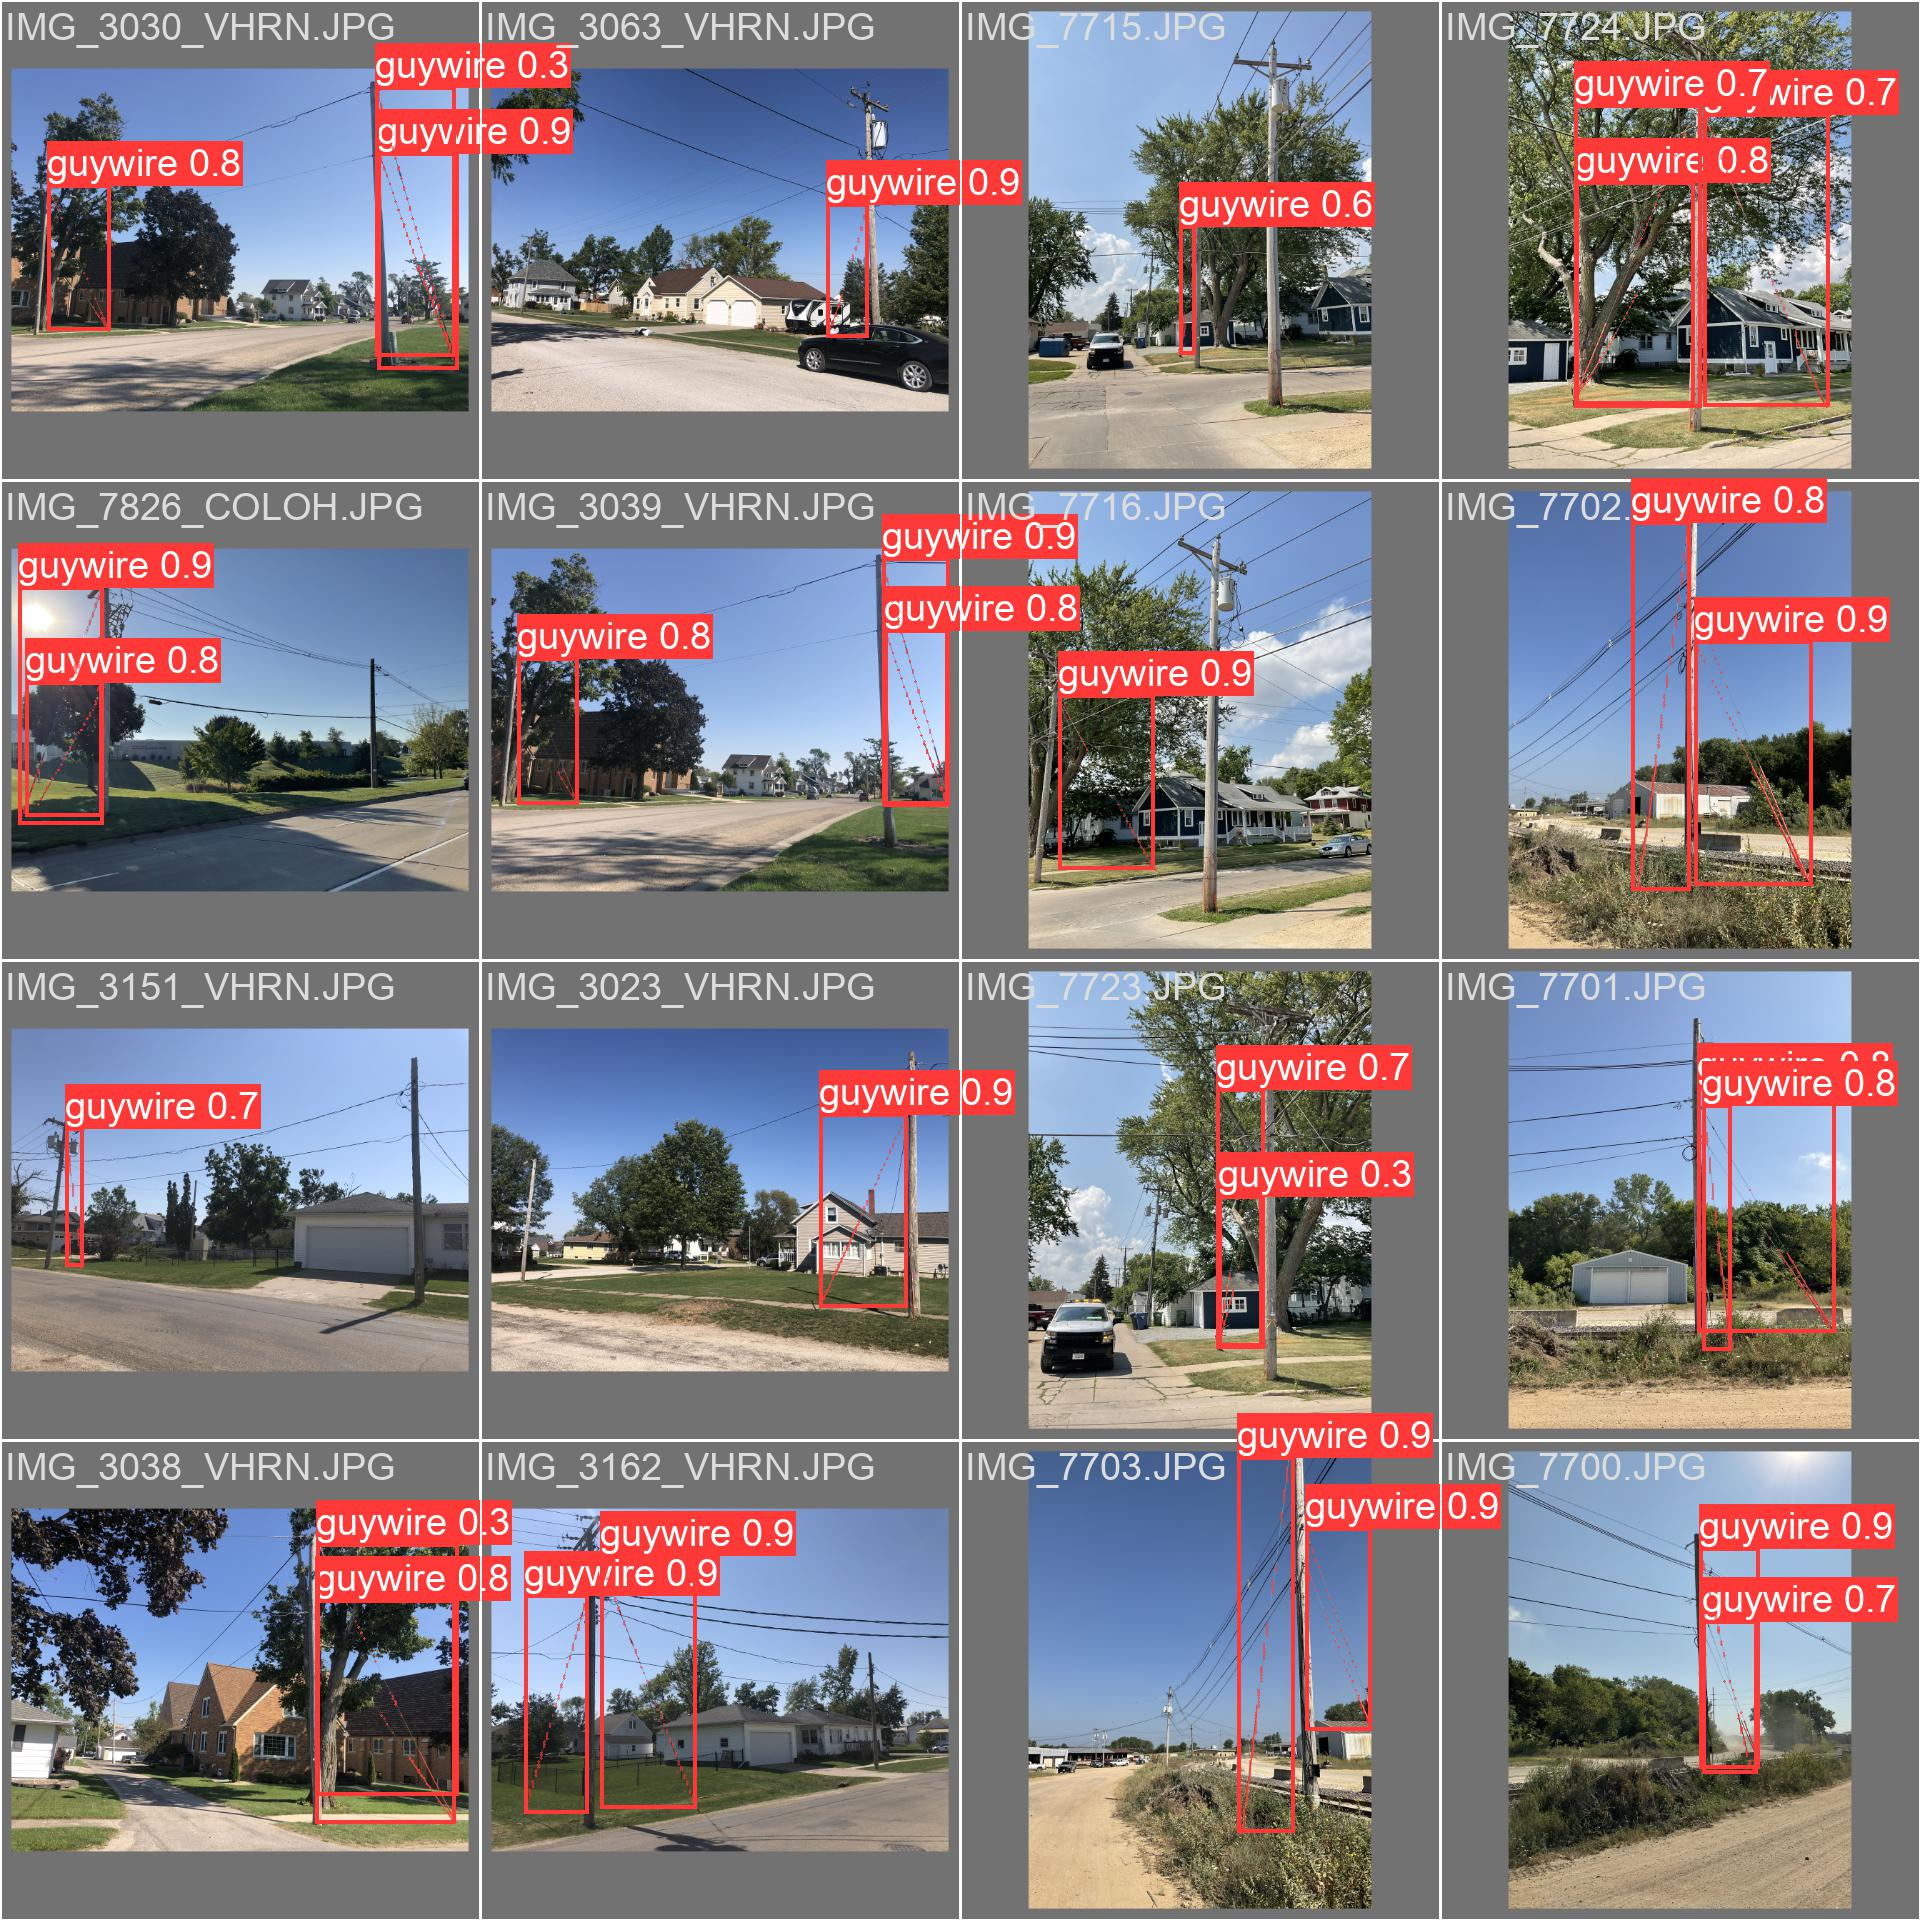

In [ ]:
Image(filename='/content/runs/segment/val/val_batch0_pred.jpg')

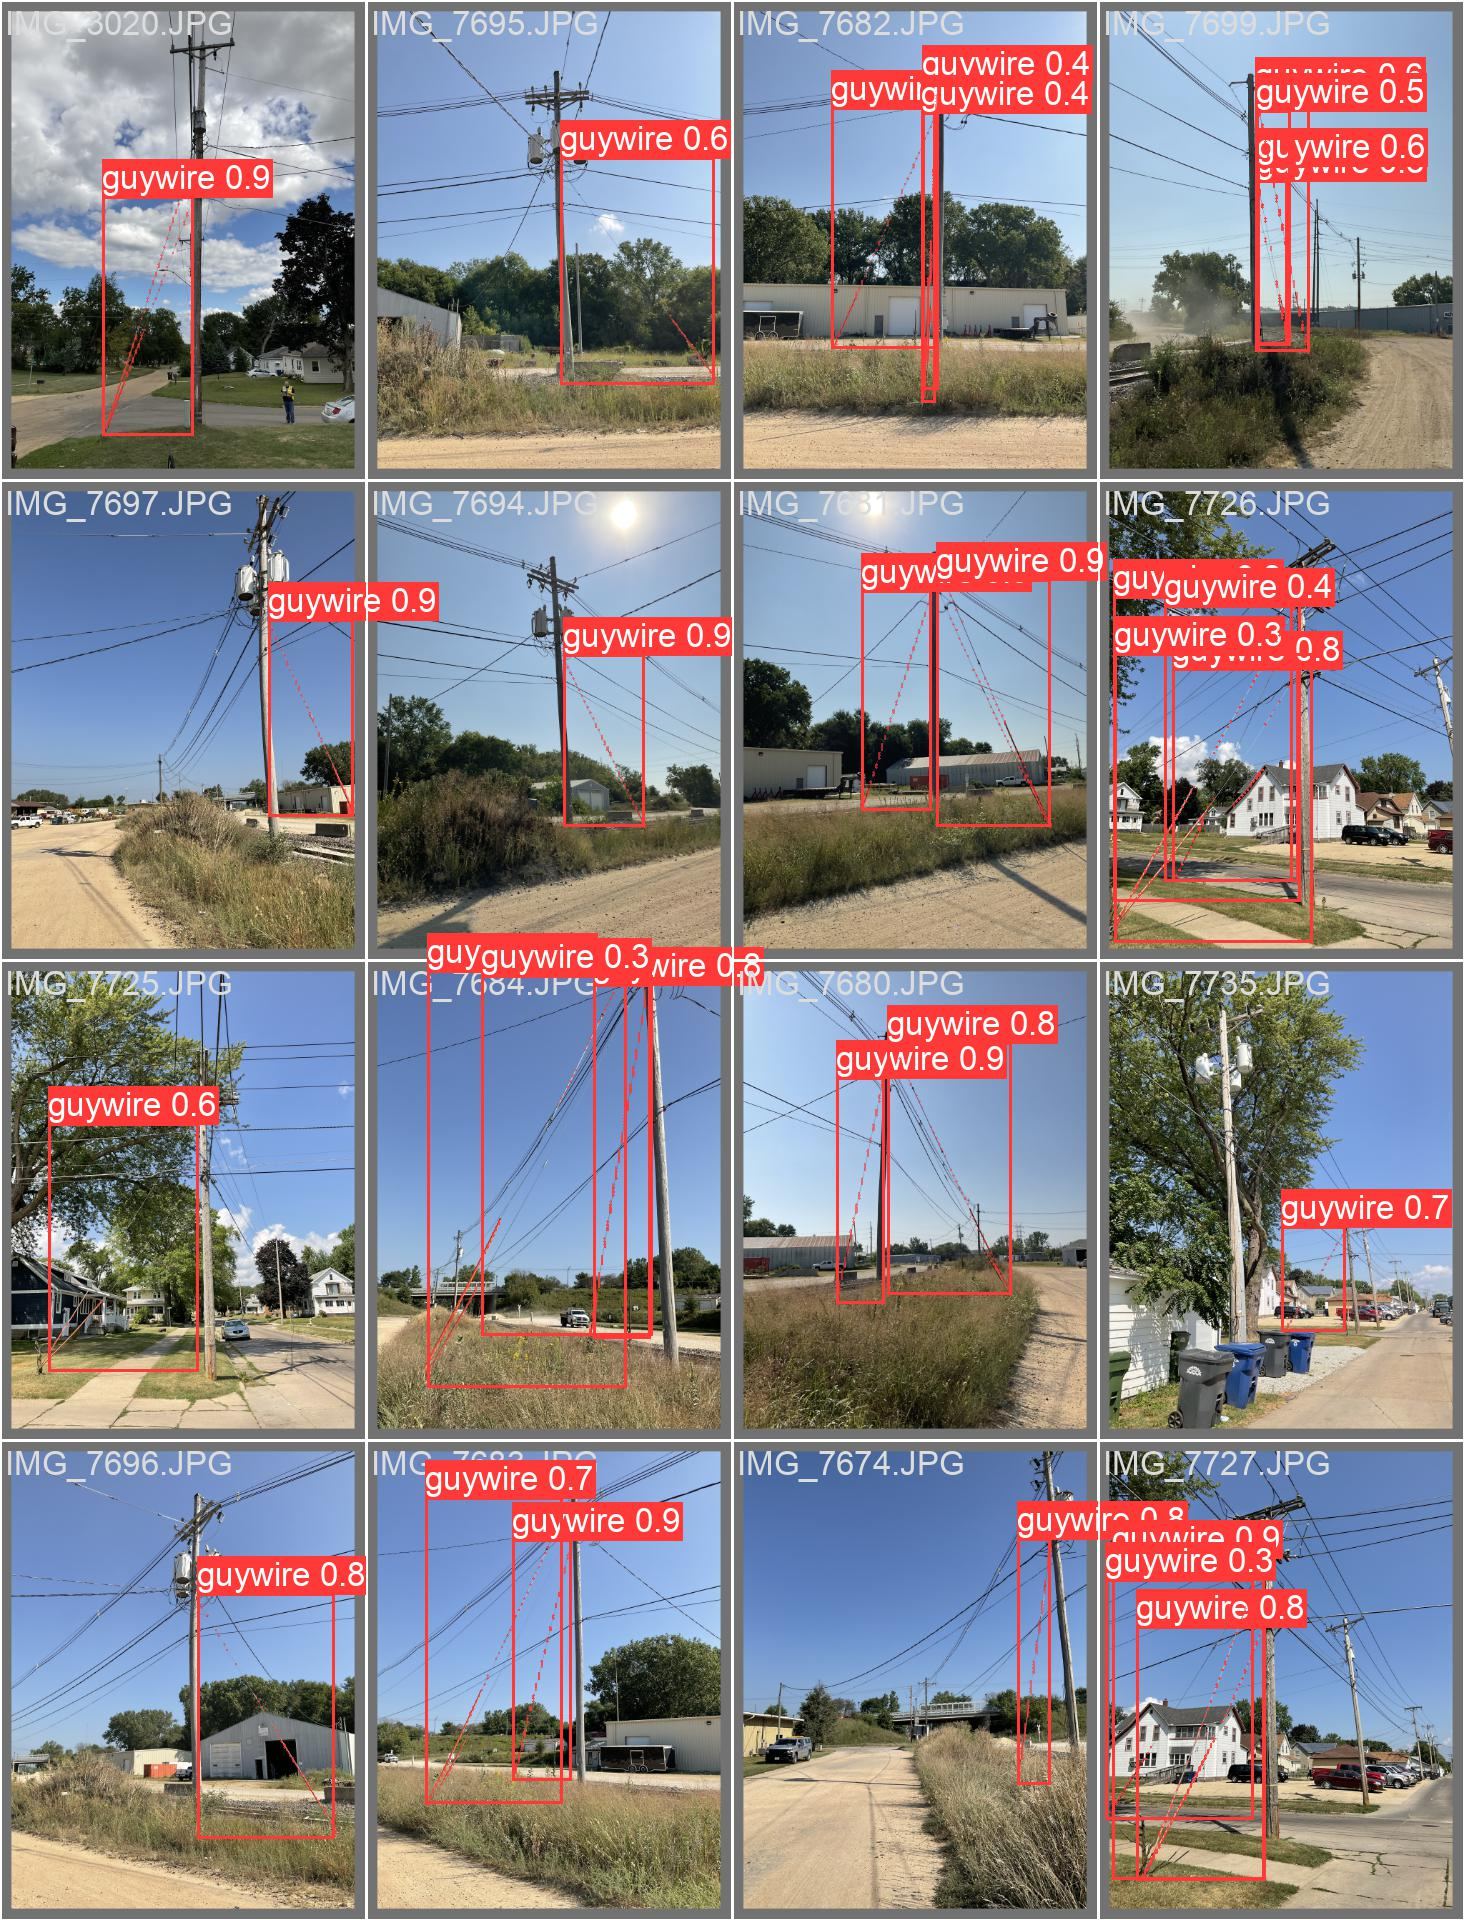

In [ ]:
Image(filename='/content/runs/segment/val/val_batch1_pred.jpg')

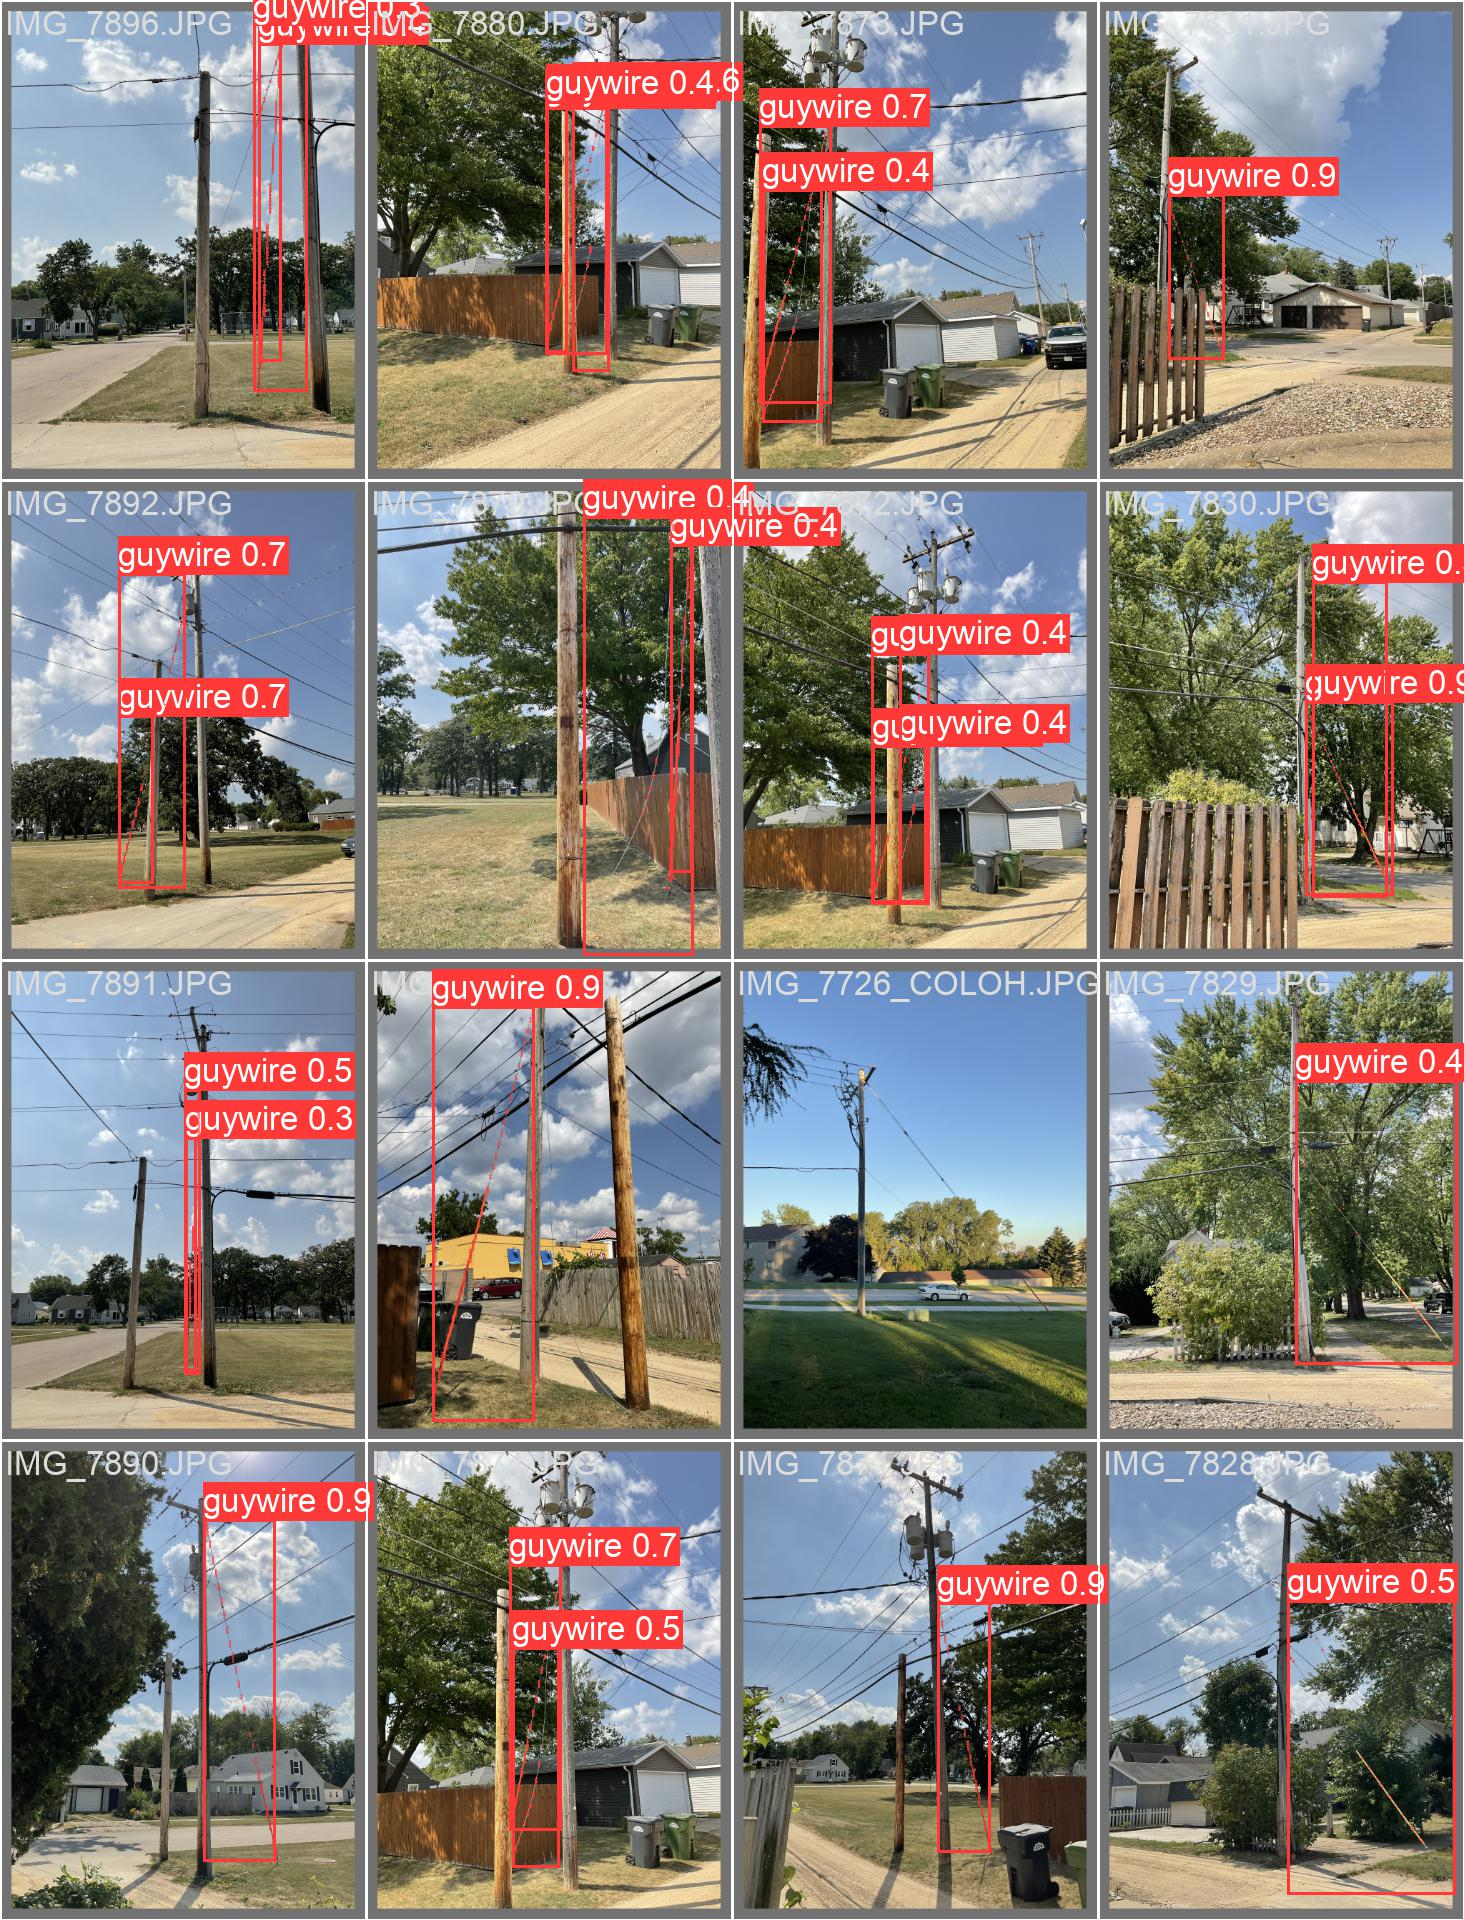

In [ ]:
Image(filename='/content/runs/segment/val/val_batch2_pred.jpg')

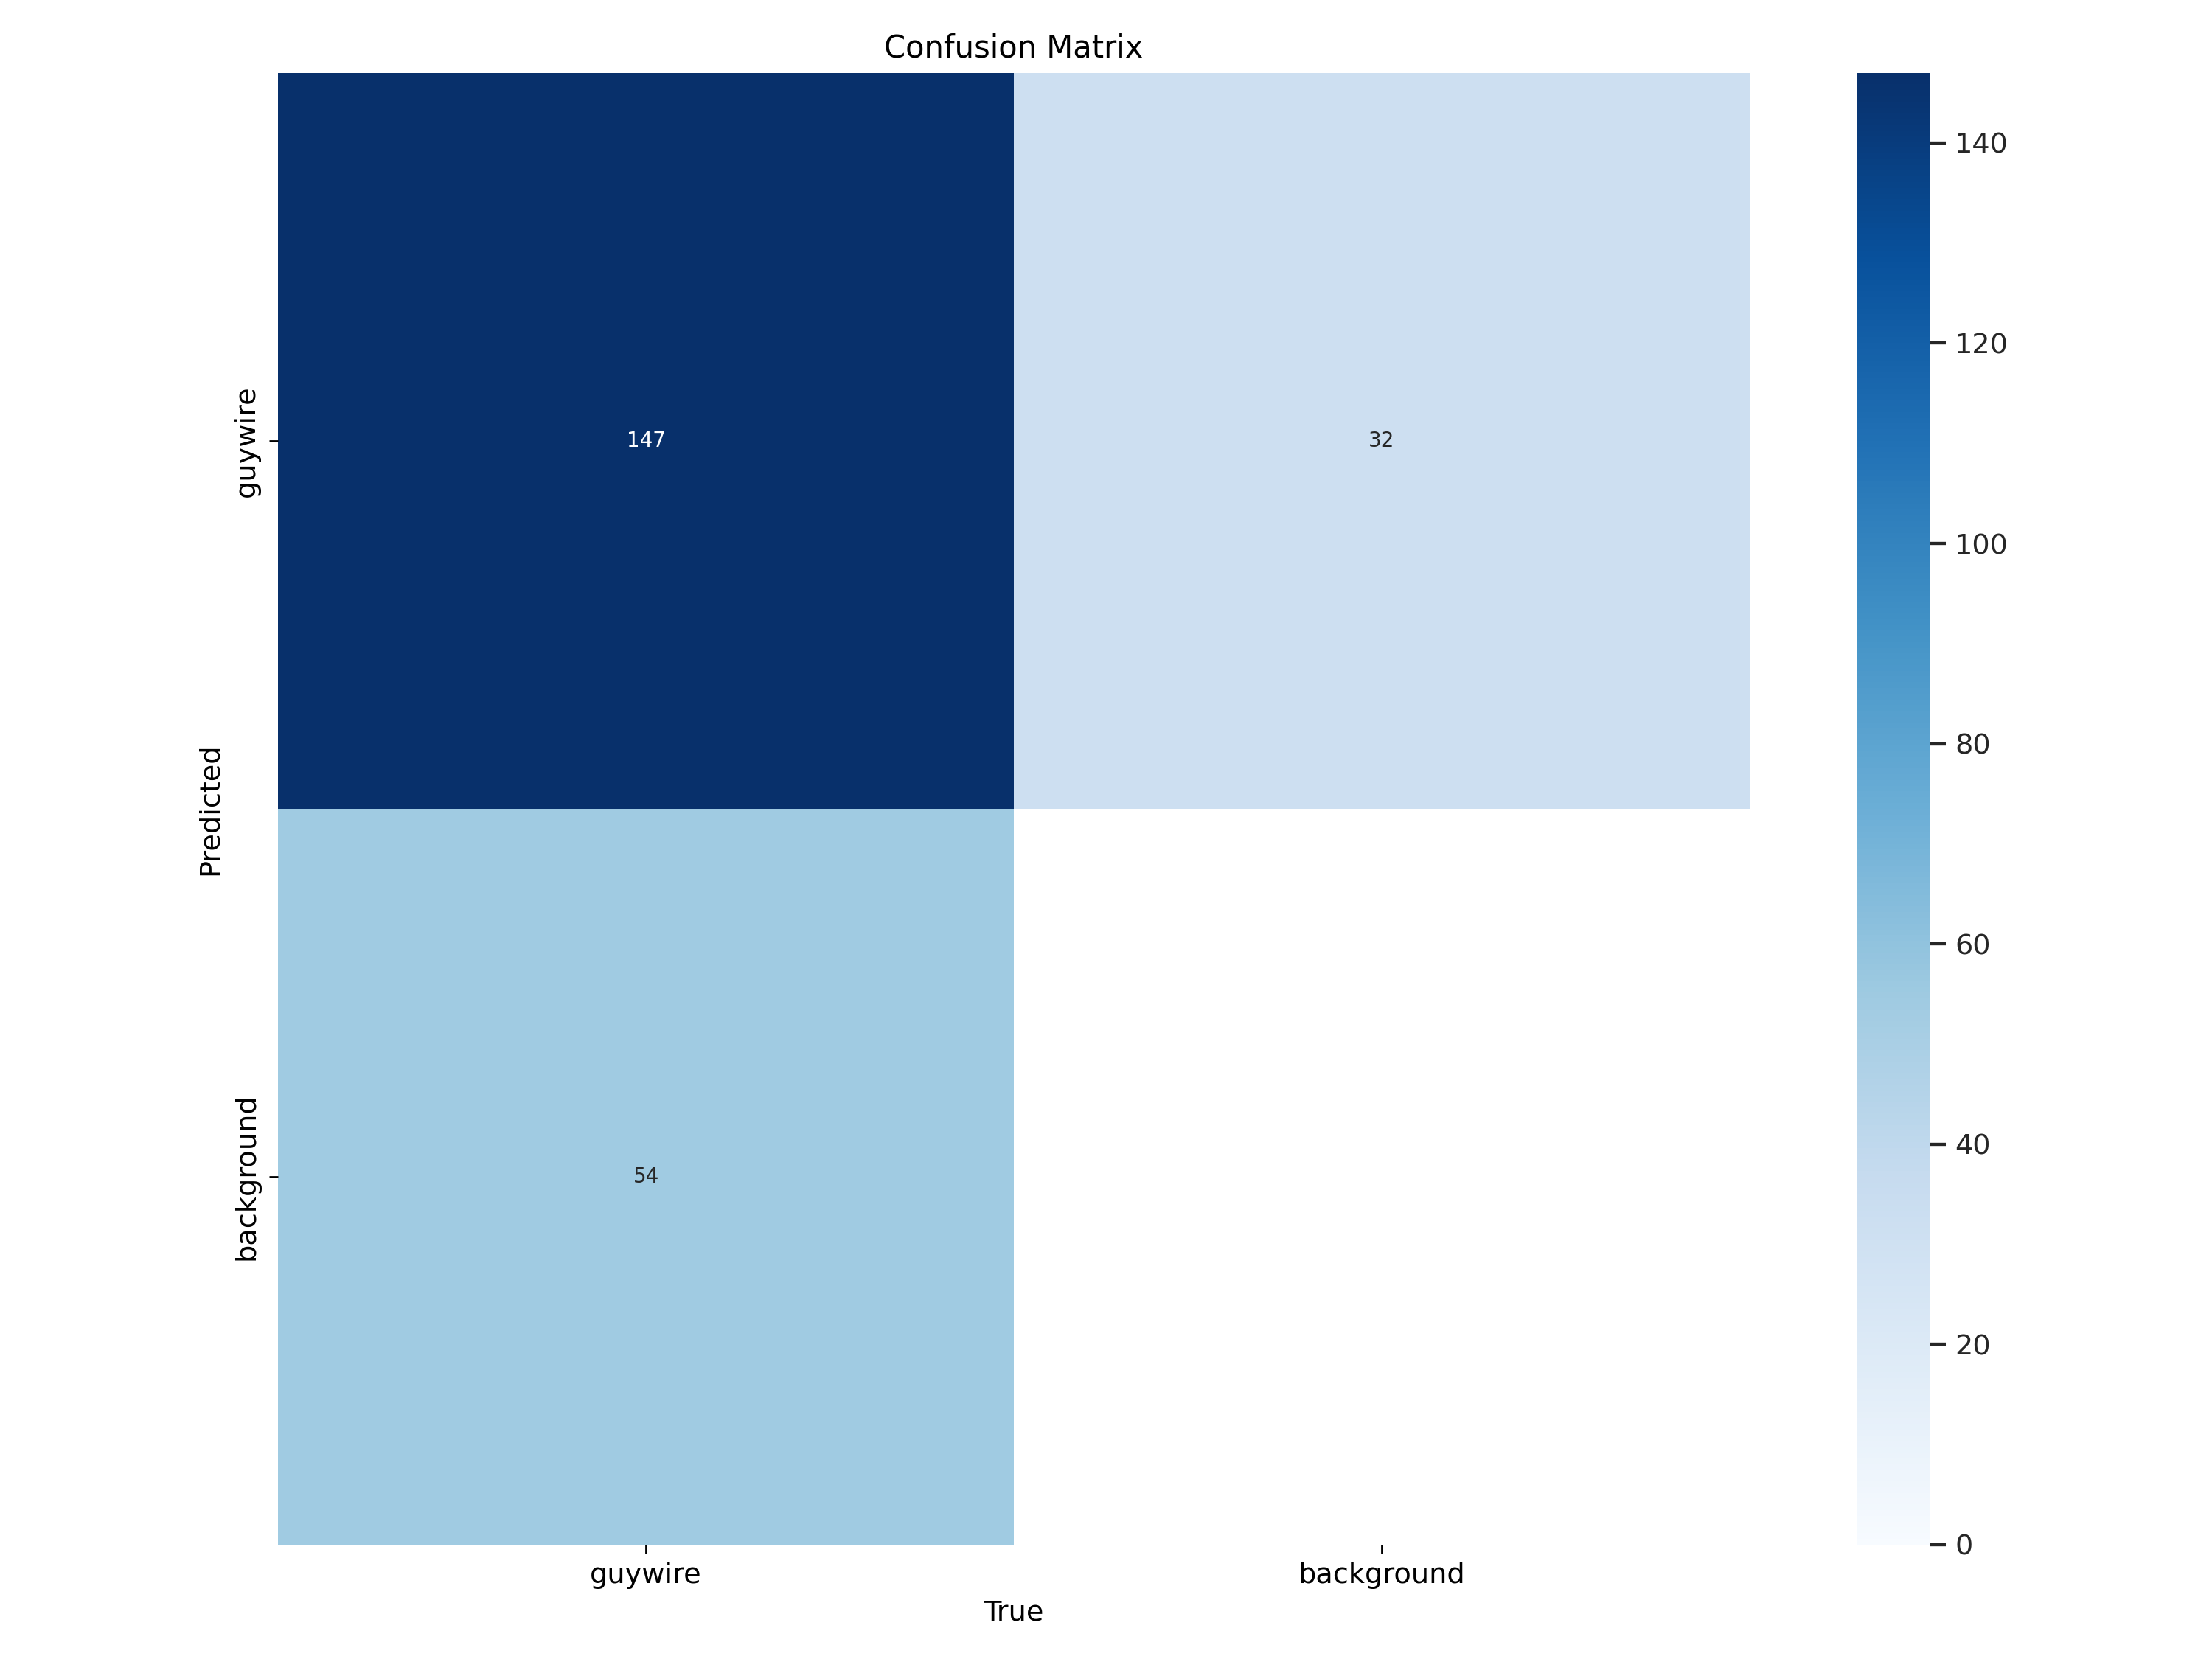

In [ ]:
Image(filename='/content/runs/segment/train/confusion_matrix.png', width=600)

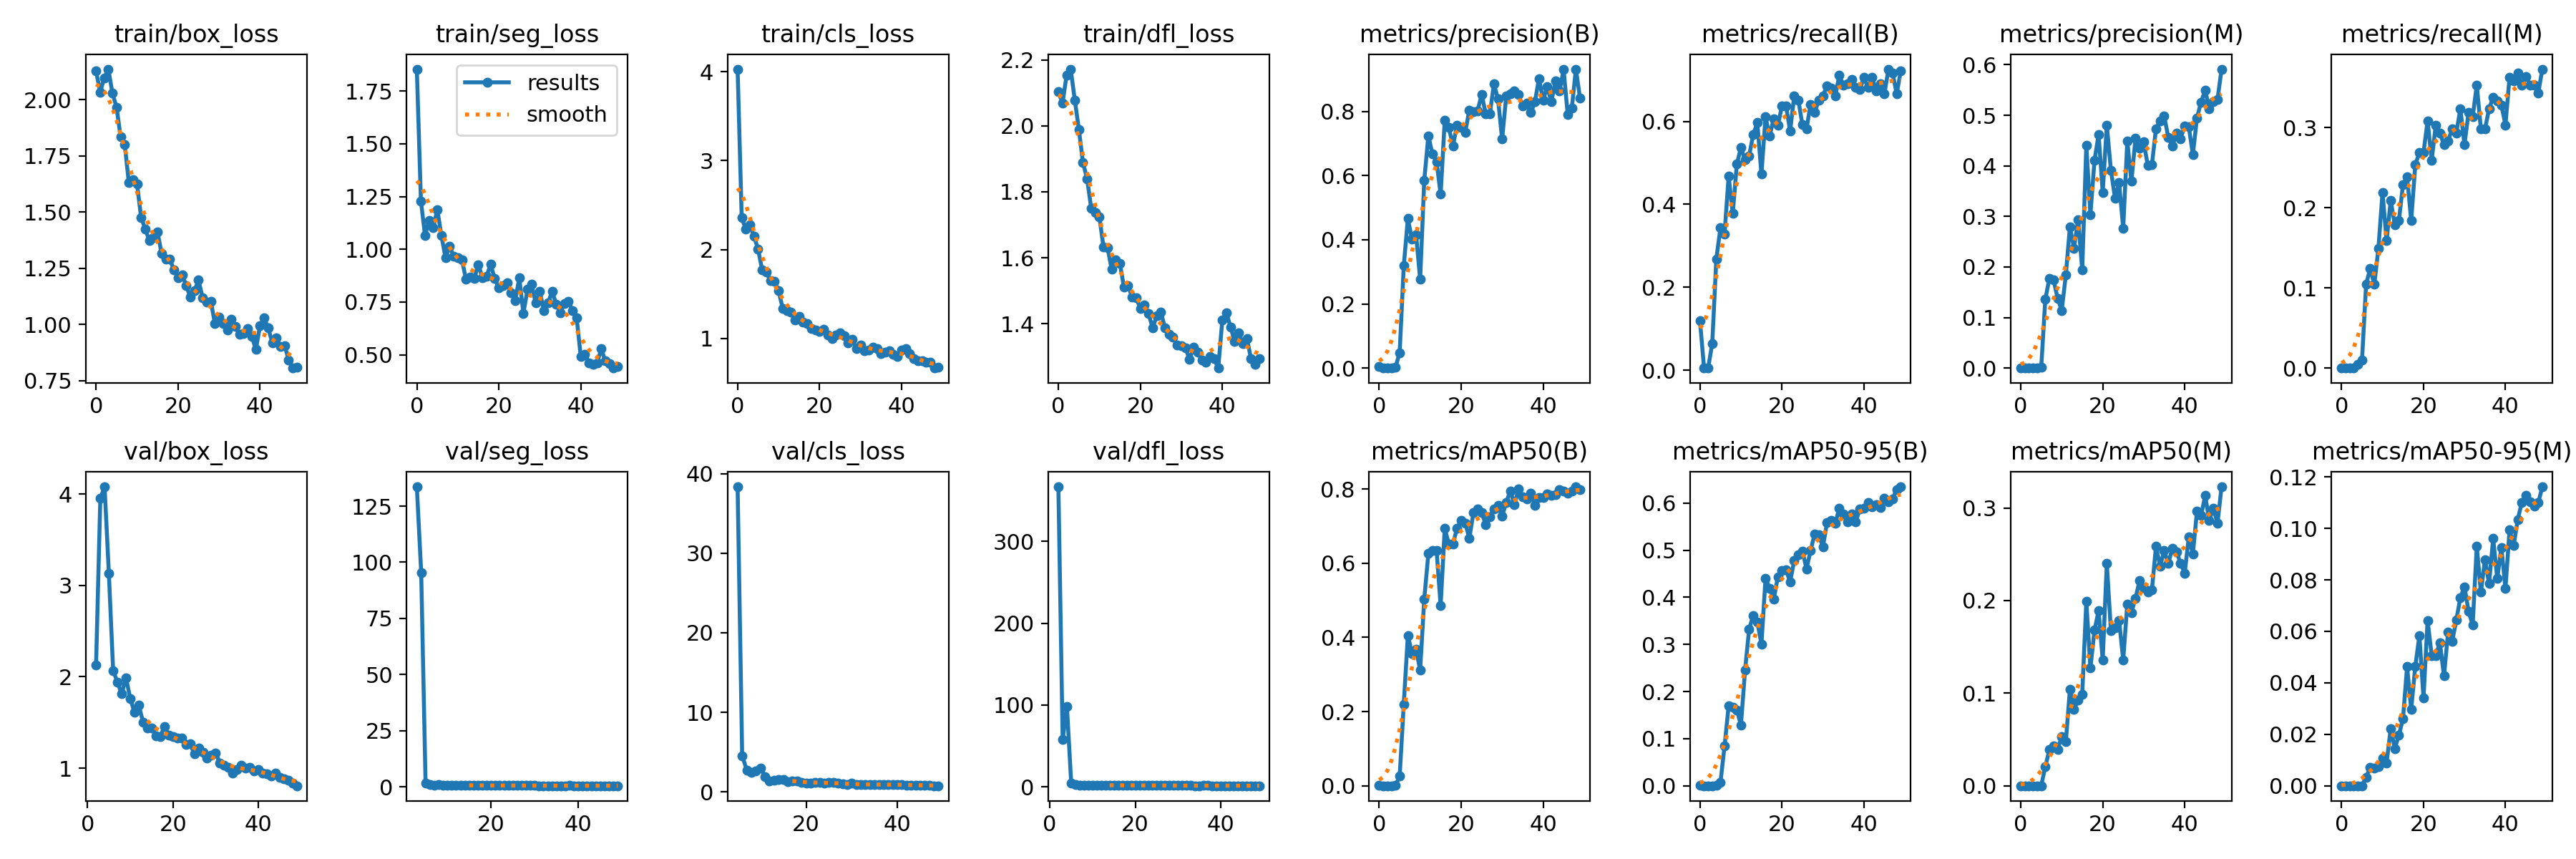

In [ ]:
Image(filename='/content/runs/segment/train/results.png')

In [ ]:
"""
val/seg_loss, val/cls_loss, val/dfl_loss looks too steep
"""

# RESEARCH, SANDBOX

In [ ]:
IL_2 = "/content/drive/MyDrive/Projects/gw/test/images/IMG_7908.JPG"
IL_3 = "/content/drive/MyDrive/Projects/gw/test/images/IMG_8163.JPG"

## Canny edge

In [ ]:
img = cv2.imread(IL_3, cv2.IMREAD_COLOR)

assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv2.Canny(img,100,200)

edges_2 = np.copy(edges)

plt.figure(figsize=(16,8))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Hough Line Transform

In [ ]:
src = cv.imread(IL_2, cv.IMREAD_COLOR)
# src = cv.imread(IL_3, cv.IMREAD_COLOR)

# src = sharpened_IL_1.copy()
# src = sharpened_IL_2.copy()
# src = sharpened_IL_3.copy()

dst = cv.Canny(src, 50, 200, None, 3)

# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
  for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)


linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

if linesP is not None:
  for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)



from google.colab.patches import cv2_imshow
cv2_imshow(src)
print()

cv2_imshow(cdst) # "Detected Lines (in red) - Standard Hough Line Transform"
print()

cv2_imshow(cdstP) # "Detected Lines (in red) - Probabilistic Line Transform",

## Color-Based Segmentation

In [ ]:
hsv = cv.imread(IL_3, cv.IMREAD_COLOR)

# Threshold of blue in HSV space
# lower_blue = np.array([60, 35, 140])
# upper_blue = np.array([180, 255, 255])
#
lower_blue = np.array([0, 0, 0])
upper_blue = np.array([200, 200, 200])

# preparing the mask to overlay
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# The black region in the mask has the value of 0,
# so when multiplied with original image removes all non-blue regions
result = cv2.bitwise_and(hsv, hsv, mask = mask)

cv2_imshow(hsv)
cv2_imshow(mask) # 'mask'
cv2_imshow(result) # 'result',

## Sharpening

In [ ]:
img = cv.imread("/content/drive/MyDrive/Projects/gw/test/images/IMG_8199.JPG", cv.IMREAD_COLOR)

# Create the sharpening kernel
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

# Apply the sharpening kernel to the image using filter2D
sharpened_IL_3 = cv2.filter2D(img, -1, kernel)

cv2_imshow(img)
print()
cv2_imshow(sharpened_IL_3)

In [ ]:
src = sharpened_IL_3.copy()

dst = cv.Canny(src, 50, 200, None, 3)

# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
  for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)


linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

if linesP is not None:
  for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)


from google.colab.patches import cv2_imshow
cv2_imshow(src)
print()

cv2_imshow(cdst) # "Detected Lines (in red) - Standard Hough Line Transform"
print()

cv2_imshow(cdstP) # "Detected Lines (in red) - Probabilistic Line Transform",